In [1]:
import csv
import numpy as np
import matplotlib.pylab as pl
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from scipy import signal

%matplotlib inline

pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20
pl.rcParams['font.sans-serif'] = 'serif'
pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 4
pl.rcParams['xtick.minor.size'] = 2
pl.rcParams['xtick.major.pad']  = 8
pl.rcParams['xtick.minor.pad']  = 8
pl.rcParams['xtick.color']      = 'k'
pl.rcParams['xtick.labelsize']  = 'small'
pl.rcParams['xtick.direction']  = 'in'

pl.rcParams['ytick.major.size'] = 8
pl.rcParams['ytick.minor.size'] = 4
pl.rcParams['ytick.major.pad']  = 8
pl.rcParams['ytick.minor.pad']  = 8
pl.rcParams['ytick.color']      = 'k'
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'

In [2]:
def gaussian(x, V_0, delta_V, c):
    exponential_term = np.power(((x - V_0)/delta_V), 2)
    return c*np.exp(-exponential_term)

In [3]:
def noise_fitting_function(w, a, b, c):
    fall_off_term = a/np.power(w, b)
    johnson       = c
    return fall_off_term + johnson

### Measured Current Values for 100uA range in a resistor (Res_7 : 1K, 0.1%) at V = 0.05V

popt :
[  5.01828751e-05  -4.93609657e-09   1.72997409e+03]
pcov :
[[  1.89878677e-20   3.00519035e-24   1.02916991e-12]
 [  3.00519035e-24   3.79764723e-20   6.65498128e-09]
 [  1.02916991e-12   6.65498128e-09   3.49860630e+03]]


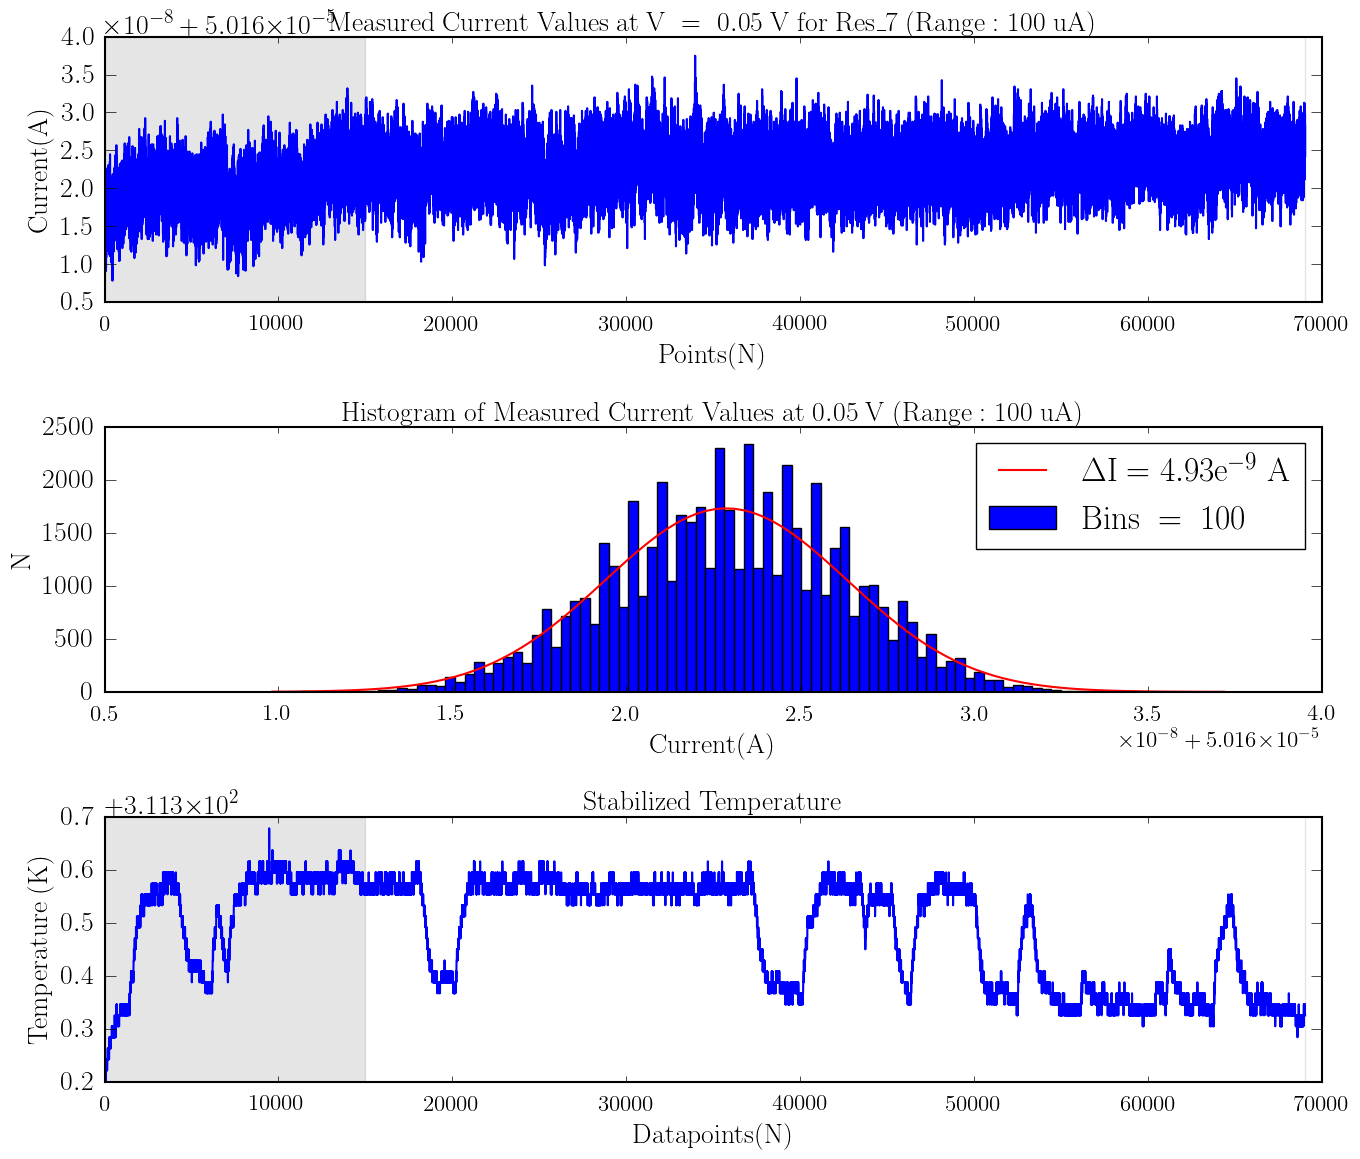

In [5]:
with open("CurrentMeasurementNoiseData/I-Data_100uA_Res_7_0.05V.txt" , "r") as f:
    current        = []
    temperature    = []
    i = 0
    for line in f:
        current_time_tuple = line.strip('\n').split(',')
        if (len(current_time_tuple) == 2):
            current.append(float(current_time_tuple[0]))
            temperature.append(float(current_time_tuple[1]))

N_samples     = len(current)
temperature_1 = np.array(temperature)
x_1           = np.arange(0, len(current), 1)
y_1           = np.array(current)

start_index   = 15000
end_index     = N_samples

pl.figure (figsize=(14, 12))
pl.subplot(311)
pl.title  ("$\mathrm{Measured\ Current\ Values\ at\ V\ =\ 0.05\;V\;for\;Res\_7\;(Range:100\;uA)}$")
pl.xlabel ("$\mathrm{Points (N)}$")
pl.ylabel ("$\mathrm{Current(A)}$")
pl.plot   (x_1, y_1)
pl.axvspan(0, start_index, color="black",alpha=0.1)
pl.axvspan(end_index, N_samples, color="black", alpha=0.1)


pl.subplot(312)

Bins               = 100
counts, bins, bars = pl.hist(y_1[start_index:end_index], bins=Bins, label = "$\mathrm{Bins\ =\ %d}$" %Bins)

params = [np.mean(y_1[start_index:end_index]), np.std(y_1[start_index:end_index]), 100]
popt, pcov    = curve_fit(gaussian, bins[:-1], counts, p0=params)

print "popt :"
print popt
print "pcov :"
print pcov

pl.plot   (bins[:-1], gaussian(bins[:-1], popt[0], popt[1], popt[2])\
           , color="red", label=r"$\mathrm{\Delta I = 4.93e^{-9}\;A}$")

pl.title  ("$\mathrm{Histogram\ of\ Measured\ Current\ Values\ at\ 0.05\;V\;(Range:100\;uA)}$")
pl.xlabel ("$\mathrm{Current(A)}$")
pl.ylabel ("$\mathrm{N}$")
pl.legend (loc = 'best')

pl.subplot(313)
pl.plot   (x_1, temperature_1)
pl.title  ("$\mathrm{Stabilized\ Temperature}$")
pl.xlabel ("$\mathrm{Datapoints(N)}$")
pl.ylabel ("$\mathrm{Temperature\ (K)}$")
pl.axvspan(0, start_index, color="black",alpha=0.1)
pl.axvspan(end_index, N_samples, color="black", alpha=0.1)

#pl.subplots_adjust(hspace=0.6)
pl.tight_layout()

popt :
[  1.00000000e-20   4.00000000e+00   1.00000000e-12]
pcov :
[[ inf  inf  inf]
 [ inf  inf  inf]
 [ inf  inf  inf]]


/projects/sage/sage-7.6/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


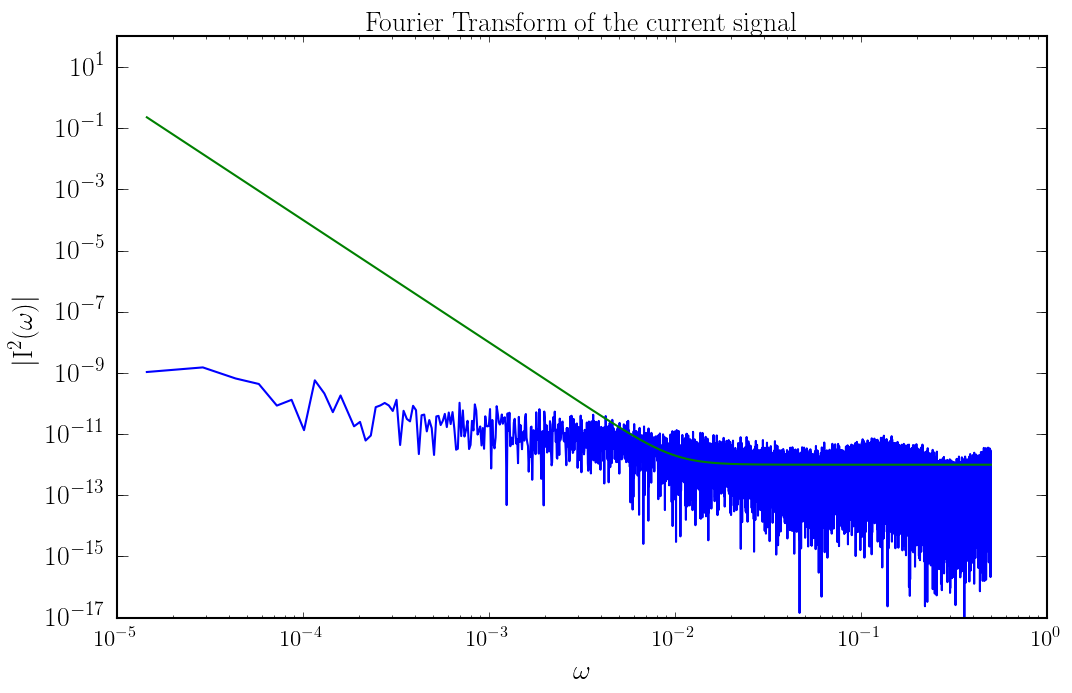

In [8]:
freq       = np.fft.fftfreq(N_samples)
fft_array  = np.fft.fft(y_1)

pl.loglog (freq[:N_samples/2], np.abs((fft_array)[:N_samples/2]**2))
pl.title  ("$\mathrm{Fourier\;Transform\;of\;the\;current\;signal}$")
pl.xlabel ('$\mathrm{\omega}$')
pl.ylabel ('$|\mathrm{I^{2}(\omega)}|$')

params = [1e-20, 4, 1e-12]
popt, pcov = curve_fit(noise_fitting_function, freq[:N_samples/2], np.abs(((fft_array)[:N_samples/2])**2), p0=params)

print "popt :"
print popt
print "pcov :"
print pcov

pl.loglog(freq, noise_fitting_function(freq, *popt), label = 'fit')


### Measured Current Values for 1mA range in a resistor (Res_7 : 1K, 0.1%) at V = 0.5V

popt :
[  4.99624467e-04   7.40051701e-09   1.59569809e+03]
pcov :
[[  3.45935429e-19  -3.48765204e-22   7.51086042e-11]
 [ -3.48765204e-22   6.91874471e-19  -7.45851954e-08]
 [  7.51086042e-11  -7.45851954e-08   2.41211108e+04]]


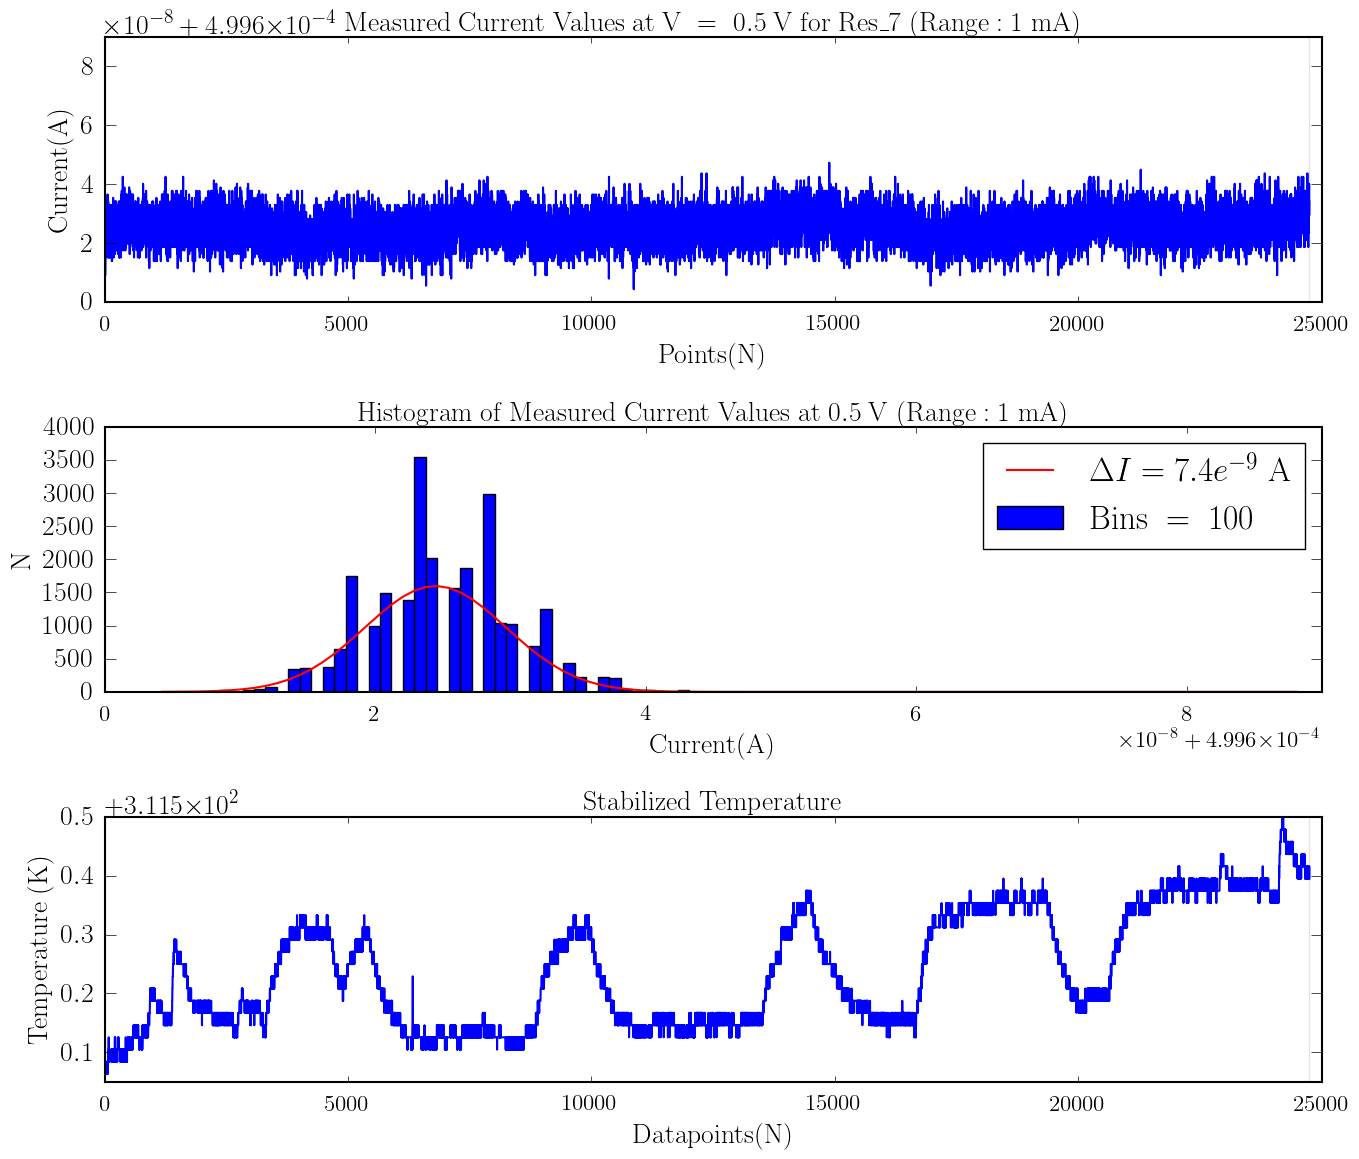

In [13]:
with open("CurrentMeasurementNoiseData/I-Data_1mA_Res_7_0.5V.txt" , "r") as f:
    current        = []
    temperature    = []
    i = 0
    for line in f:
        current_time_tuple = line.strip('\n').split(',')
        if (len(current_time_tuple) == 2):
            current.append(float(current_time_tuple[0]))
            temperature.append(float(current_time_tuple[1]))

N_samples     = len(current)
temperature_2 = np.array(temperature)
x_2           = np.arange(0, len(current), 1)
y_2           = np.array(current)

start_index   = 0
end_index     = N_samples

pl.figure (figsize=(14, 12))

pl.subplot(311)

pl.title  ("$\mathrm{Measured\ Current\ Values\ at\ V\ =\ 0.5\;V\;for\;Res\_7\;(Range:1\;mA)}$")
pl.xlabel ("$\mathrm{Points (N)}$")
pl.ylabel ("$\mathrm{Current(A)}$")
pl.plot   (x_2, y_2)
pl.axvspan(0, start_index, color="black",alpha=0.1)
pl.axvspan(end_index, N_samples, color="black", alpha=0.1)


pl.subplot(312)

Bins               = 100
counts, bins, bars = pl.hist(y_2[start_index:end_index], bins=Bins, label = "$\mathrm{Bins\ =\ %d}$" %Bins)

params = [np.mean(y_2), np.std(y_2), 4000]
popt, pcov    = curve_fit(gaussian, bins[:-1], counts, p0=params)

print "popt :"
print popt
print "pcov :"
print pcov


pl.plot   (bins[:-1], gaussian(bins[:-1], popt[0], popt[1], popt[2])\
           , color="red", label=r"$\Delta I = 7.4e^{-9}\;\mathrm{A}$")

pl.title  ("$\mathrm{Histogram\ of\ Measured\ Current\ Values\ at\ 0.5\;V\;(Range:1\;mA)}$")
pl.xlabel ("$\mathrm{Current(A)}$")
pl.ylabel ("$\mathrm{N}$")
pl.legend (loc = 'best')

pl.subplot(313)

pl.plot   (x_2, temperature_2)
pl.title  ("$\mathrm{Stabilized\ Temperature}$")
pl.xlabel ("$\mathrm{Datapoints(N)}$")
pl.ylabel ("$\mathrm{Temperature\ (K)}$")
pl.axvspan(0, start_index, color="black",alpha=0.1)
pl.axvspan(end_index, N_samples, color="black", alpha=0.1)

#pl.subplots_adjust(hspace=0.6)
pl.tight_layout()

popt :
[  1.00000000e-25   8.00000000e+00   1.00000000e-06]
pcov :
[[ inf  inf  inf]
 [ inf  inf  inf]
 [ inf  inf  inf]]


/projects/sage/sage-7.6/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


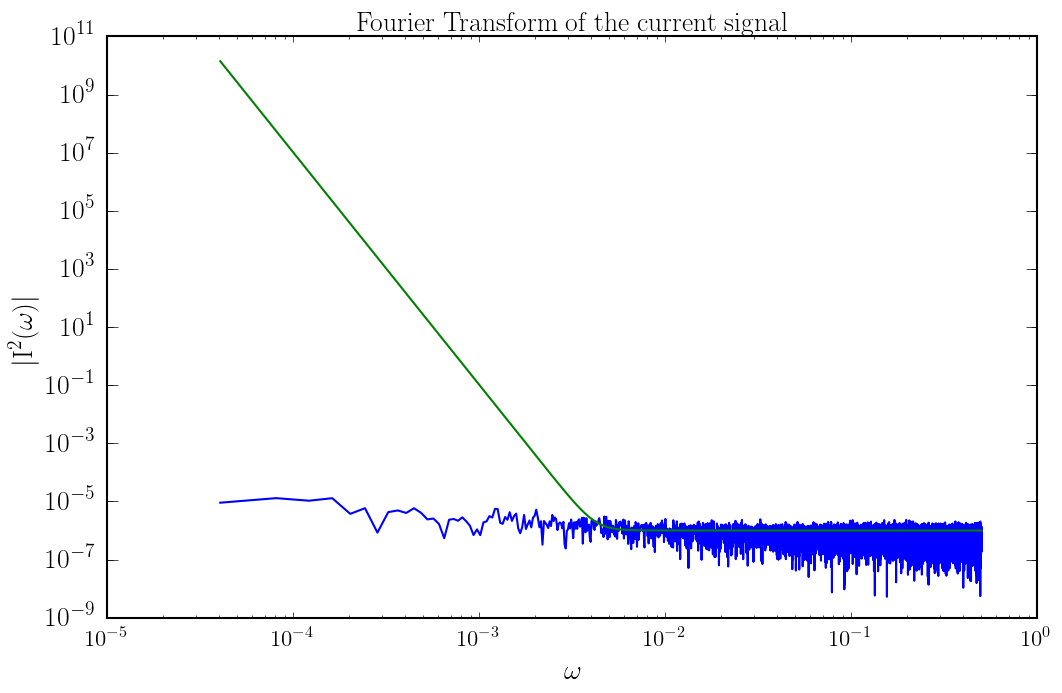

In [12]:
freq       = np.fft.fftfreq(N_samples)
fft_array  = np.fft.fft(y_2)

pl.loglog (freq[:N_samples/2], np.abs(fft_array)[:N_samples/2])
pl.title  ("$\mathrm{Fourier\;Transform\;of\;the\;current\;signal}$")
pl.xlabel ('$\mathrm{\omega}$')
pl.ylabel ('$|\mathrm{I^{2}(\omega)}|$')

params = [1e-25, 8, 1e-6]
popt, pcov = curve_fit(noise_fitting_function, freq[:N_samples/2], np.abs(((fft_array)[:N_samples/2])**2), p0=params)

print "popt :"
print popt
print "pcov :"
print pcov

pl.loglog(freq, noise_fitting_function(freq, *popt), label = 'fit')



### Measured Current Values for 10mA range in a resistor (Res_7 : 1K, 0.1%) at V = 5V

popt :
[  5.07723486e-03   7.09349608e-08   9.44465153e+02]
pcov :
[[  1.22648034e-16  -1.33611485e-19   1.75866455e-09]
 [ -1.33611485e-19   2.45309530e-16  -1.63288165e-06]
 [  1.75866455e-09  -1.63288165e-06   3.26062659e+04]]


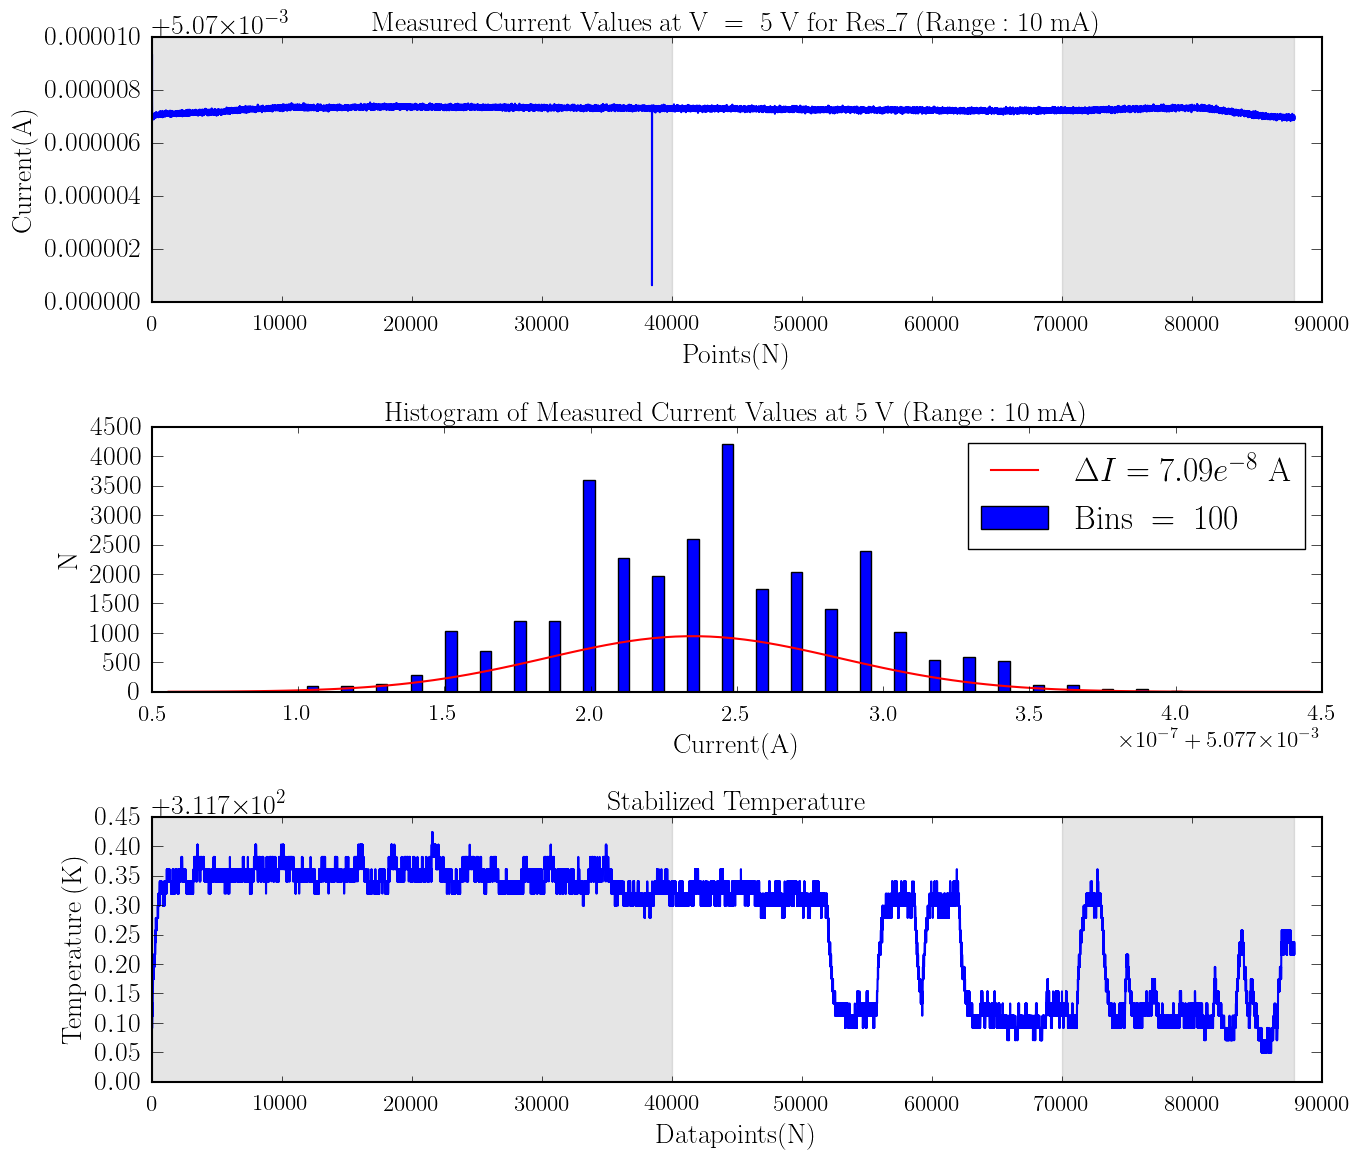

In [17]:
with open("CurrentMeasurementNoiseData/I-Data_10mA_Res_7_5V.txt" , "r") as f:
    current        = []
    temperature    = []

    for line in f:
        current_time_tuple = line.strip('\n').split(',')
        if (len(current_time_tuple) == 2):
            current.append(float(current_time_tuple[0]))
            temperature.append(float(current_time_tuple[1]))

N_samples     = len(current)
temperature_3 = np.array(temperature)
x_3           = np.arange(0, len(current), 1)
y_3           = np.array(current)

start_index   = 40000
end_index     = 70000

pl.figure (figsize=(14, 12))
pl.subplot(311)
pl.title  ("$\mathrm{Measured\ Current\ Values\ at\ V\ =\ 5\;V\;for\;Res\_7\;(Range:10\;mA)}$")
pl.xlabel ("$\mathrm{Points (N)}$")
pl.ylabel ("$\mathrm{Current(A)}$")
pl.plot   (x_3, y_3)
pl.axvspan(0, start_index, color="black",alpha=0.1)
pl.axvspan(end_index, N_samples, color="black", alpha=0.1)


pl.subplot(312)

Bins               = 100
counts, bins, bars = pl.hist(y_3[start_index:end_index], bins=Bins, label = "$\mathrm{Bins\ =\ %d}$" %Bins)

params = [np.mean(y_3[start_index:end_index]), np.std(y_3[start_index:end_index]), 7000]
popt, pcov    = curve_fit(gaussian, bins[:-1], counts, p0=params)

print "popt :"
print popt
print "pcov :"
print pcov

pl.plot   (bins[:-1], gaussian(bins[:-1], popt[0], popt[1], popt[2])\
           , color="red", label=r"$\Delta I = 7.09e^{-8}\;\mathrm{A}$")
pl.title  ("$\mathrm{Histogram\ of\ Measured\ Current\ Values\ at\ 5\;V\;(Range:10\;mA)}$")
pl.xlabel ("$\mathrm{Current(A)}$")
pl.ylabel ("$\mathrm{N}$")
pl.legend (loc = 'best')

pl.subplot(313)
pl.plot   (x_3, temperature_3)
pl.title  ("$\mathrm{Stabilized\ Temperature}$")
pl.xlabel ("$\mathrm{Datapoints(N)}$")
pl.ylabel ("$\mathrm{Temperature\ (K)}$")
pl.axvspan(0, start_index, color="black",alpha=0.1)
pl.axvspan(end_index, N_samples, color="black", alpha=0.1)

#pl.subplots_adjust(hspace=0.6)
pl.tight_layout()

popt :
[  1.00000000e-22   3.90000000e+00   1.00000000e-10]
pcov :
[[ inf  inf  inf]
 [ inf  inf  inf]
 [ inf  inf  inf]]


/projects/sage/sage-7.6/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/projects/sage/sage-7.6/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


/projects/sage/sage-7.6/local/lib/python2.7/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


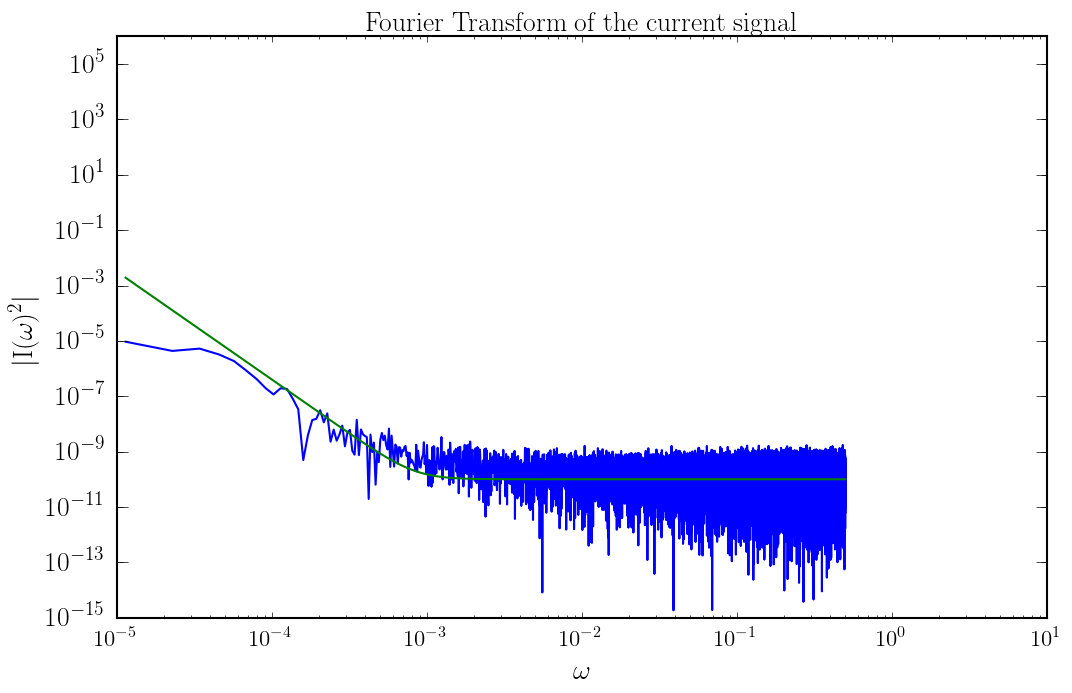

In [18]:
freq       = np.fft.fftfreq(N_samples)
fft_array  = np.fft.fft(y_3)

pl.loglog (freq[:N_samples/2], np.abs((fft_array)[:N_samples/2])**2, label = 'data')
pl.title  ("$\mathrm{Fourier\;Transform\;of\;the\;current\;signal}$")
pl.xlabel ('$\mathrm{\omega}$')
pl.ylabel ('$|\mathrm{I(\omega)^{2}}|$')
pl.xlim (1e-5, 10)

params = [1e-22, 3.9, 1e-10]
popt, pcov = curve_fit(noise_fitting_function, freq[:N_samples/2], np.abs(((fft_array)[:N_samples/2])**2), p0=params)

print "popt :"
print popt
print "pcov :"
print pcov

pl.loglog(freq, noise_fitting_function(freq, *popt), label = 'fit')

